In [59]:
import qiskit as q
%matplotlib inline

circuit = q.QuantumCircuit(2,2) # 2 qubits , 2 normal bits

#now (0,0)
circuit.x(0) # "x" is a "not" gate. It flips the value. Starting value is a 0, so this flips to a 1. 
#(1,0)
circuit.cx(0, 1) #cnot -> controlled not | Flips 2nd qubit value IF first qubit is 1
#(1,1)
circuit.measure([0,1], [0,1])  # ([qbitregister], [classicalbitregister]) Measure qubit 0 and 1 to classical bits 0 and 1
circuit.draw()

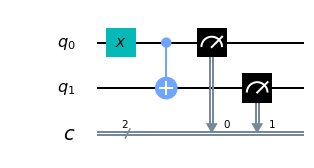

In [48]:
circuit.draw(output="mpl")

In [41]:
from qiskit import IBMQ

IBMQ.save_account(open("./ibm/token.txt","r").read())

Credentials already present. Set overwrite=True to overwrite.


In [42]:
IBMQ.load_account()

Credentials are already in use. The existing account in the session will be replaced.


<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>

In [31]:
provider = IBMQ.get_provider("ibm-q")


for backend in provider.backends():
    try:
        qubit_count = len(backend.properties().qubits)
    except:
        qubit_count = "simulated"
    print(f"{backend.name()} has {backend.status().pending_jobs} qued and {qubit_count} qubits")

ibmq_qasm_simulator has 1 qued and simulated qubits
ibmqx2 has 12 qued and 5 qubits
ibmq_16_melbourne has 4 qued and 14 qubits
ibmq_vigo has 38 qued and 5 qubits
ibmq_ourense has 23 qued and 5 qubits
ibmq_london has 27 qued and 5 qubits
ibmq_burlington has 13 qued and 5 qubits
ibmq_essex has 15 qued and 5 qubits
ibmq_armonk has 0 qued and 1 qubits


In [ ]:
from qiskit.tools.monitor import job_monitor

backend = provider.get_backend("ibmqx2")
job = q.execute(circuit, backend=backend, shots=500)
job_monitor(job)

Job Status: job is queued (1)

In [ ]:
from qiskit.visualization import plot_histogram
from matplotlib import style

style.use("dark_background")

result = job.result()
counts = result.get_counts(circuit)

plot_histogram([counts])

In [ ]:
backend = provider.get_backend("ibmq_qasm_simulator")


circuit = q.QuantumCircuit(2,2) # 2 qubits , 2 normal bits

#now (0,0)
circuit.x(0)
#(1,0)
circuit.cx(0, 1) #cnot -> controlled not | Flips 2nd qubit value IF first qubit is 1
#(1,1)
circuit.measure([0,1], [0,1])
circuit.draw()

job = q.execute(circuit, backend=backend, shots=500)
job_monitor(job)


result = job.result()
counts = result.get_counts(circuit)

plot_histogram([counts])

In [57]:
#simulated framework for qiskit
from qiskit import Aer 

sim_backend = Aer.get_backend("qasm_simulator")

for backend in Aer.backends():
    print(backend)


qasm_simulator
statevector_simulator
unitary_simulator


Job Status: job has successfully run


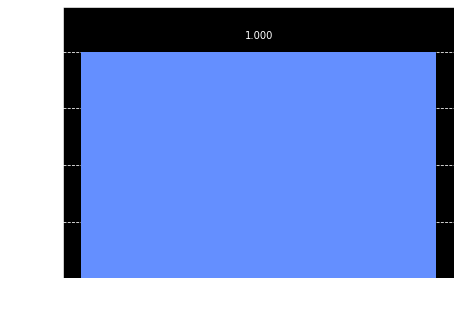

In [60]:
job = q.execute(circuit, backend=sim_backend, shots=500)
job_monitor(job)


result = job.result()
counts = result.get_counts(circuit)

plot_histogram([counts])